In [73]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
data = pd.read_csv('2008.csv.bz2')

data.info()

unique_values_list1 = list(data['Month'].unique())
print(unique_values_list1)
unique_values_list2 = list(data['DayOfWeek'].unique())
print(unique_values_list2)
unique_values_list3 = list(data['DayofMonth'].unique())
unique_values_list3

# QUESTION 1. 

How many unique carriers are there in our dataset?

In [25]:
data["UniqueCarrier"].nunique()

20

# Question 2. 

We have both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?
Hint: Take a look at Cancelled to see the categories and FlightNum column to calculate unique flights for each category.

In [29]:
data['Cancelled'].sum()

64442

In [193]:
# to see the data of the completed flights: 
completed_flights = data[data['Cancelled'] == 0]

comp_flights = data['Cancelled'] == 0
print(comp_flights.sum())

# to see the data of the cancelled flights: 
cancelled_flights = data[data['Cancelled'] == 1]

canc_flights = data['Cancelled'] == 1
print(canc_flights.sum())

2324775
64442


In [189]:
new_data = [comp_flights.sum() - canc_flights.sum()]

new_data

[2260333]

# Question 3. 

Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?

In [91]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [31]:
#data['DepDelay'].max()

d#ata['ArrDelay'].max()

2461.0

In [27]:
longest_dep_delay_flight = data.sort_values(by='DepDelay', ascending=False).iloc[0]

longest_arr_delay_flight = data.sort_values(by='ArrDelay', ascending=False).iloc[0]


In [97]:
longest_arr_delay_flight = data.sort_values(by='ArrDelay', ascending=False).iloc[0]


In [98]:
if longest_dep_delay_flight['Dest'] == longest_arr_delay_flight['Dest']:
    print("The flights with the longest departure and arrival delays have the same destination airport code:", longest_dep_delay_flight['Dest'])
else:
    print("The flights with the longest departure and arrival delays have different destination airport codes.")

The flights with the longest departure and arrival delays have the same destination airport code: MSP


# Question 4. 

Find the carrier that has the greatest number of cancelled flights.

In [34]:
cancelled_flights = data[data['Cancelled'] == 1]

# Count the number of cancelled flights for each carrier
cancelled_by_carrier = cancelled_flights['UniqueCarrier'].value_counts()

# Find the carrier with the highest number of cancelled flights
carrier_with_most_cancellations = cancelled_by_carrier.idxmax()

# idxmax method returns a Series with the index of the maximum value for each column

carrier_with_most_cancellations

'AA'

# Question 5. 

Let's examine departure time (DepTime column). Let's see how all flights are distributed by time. For simplicity, consider distribution by hour. Which hour has the highest percentage of flights?


In [35]:
# Note that this code assumes that the DepTime column is in a 24-hour format (i.e., 0000 to 2359)

data['DepTime'] = data['DepTime'].fillna(0).astype(int).astype(str)

# Extract the hour from the DepTime column and count the number of flights per hour
flights_per_hour = data['DepTime'].apply(lambda x: x[:-2]).value_counts()

# Calculate the percentage of flights per hour
percentage_per_hour = flights_per_hour / flights_per_hour.sum() * 100

# Find the hour with the highest percentage of flights
hour_with_highest_percentage = percentage_per_hour.idxmax()

# Print the hour and its percentage of flights
print(f"Highest percentage of flights is {hour_with_highest_percentage}:00, with {percentage_per_hour[hour_with_highest_percentage]:.2f}% of all flights.")

Highest percentage of flights is 6:00, with 6.30% of all flights.


# Question 6. 

OK, now let's examine cancelled flight distribution by Month. Which Month has the least percentage of cancelled flights?

In [113]:
cancelled_flights = data[data['Cancelled'] == 1]


cancelled_by_month = cancelled_flights['Month'].value_counts()


percent_cancelled_by_month = cancelled_by_month / cancelled_by_month.sum() * 100


month_with_least_cancelled = percent_cancelled_by_month.idxmin()

In [114]:
month_with_least_cancelled

4

# Question 7. 

Is there any month that didn't have any cancelled flights at all? Check all that apply.

In [67]:
# Group flights by month and count the number of cancelled flights
cancelled_by_month = data.groupby('Month')['Cancelled'].sum()

# Select the months with zero cancellations
no_cancelled_months = cancelled_by_month[cancelled_by_month == 0].index.tolist()

print(f"Months with no cancelled flights is{no_cancelled_months}")

Months with no cancelled flights is[]


# Question 8. 

Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.

Hint: Consider only completed flights.

In [70]:
df_completed = data[data['Cancelled'] == 0]

# Extract the hour from the DepTime column
df_completed['hour'] = df_completed['DepTime'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))

# Count the number of completed flights for each hour
hourly_counts = df_completed['hour'].value_counts()

# Find the hour with the maximum number of completed flights
busiest_hour = hourly_counts.idxmax()

print("The busiest hour is:", busiest_hour)

C:\Users\LG\AppData\Local\Temp\ipykernel_2788\3645990801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed['hour'] = df_completed['DepTime'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))


The busiest hour is: 6


# Question 9. 

Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour.
Are there any cases, when the planes on average departed earlier than they should have done? And if yes, 
at what departure hours did it happen?

Hint: Consider only completed flights.

In [7]:
completed_flights = data[data['Cancelled'] == 0]

# Convert DepTime column to string and extract the hour
completed_flights['DepHour'] = completed_flights['DepTime'].apply(lambda x: str(int(x)).zfill(4)[:2])

# The average delay for each hour
delay_by_hour = completed_flights.groupby('DepHour')['DepDelay'].agg('mean')

# Filter the resulting dataframe to only include the rows where the average delay is negative
early_departure_hours = delay_by_hour[delay_by_hour < 0].index.tolist()

# calling early departure hour is: 
early_departure_hours

C:\Users\LG\AppData\Local\Temp\ipykernel_12436\340610647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_flights['DepHour'] = completed_flights['DepTime'].apply(lambda x: str(int(x)).zfill(4)[:2])


['05', '06']

# Question 10. 

Considering only the completed flights by the carrier, that you have found in Question 3,
find the distribution of these flights by hour. At what time does the greatest number of its planes depart?

Hint: Consider all flights.

In [159]:
completed_flights = data[(data['Cancelled'] == 0) & (data['UniqueCarrier'])]

# Convert DepTime column to string and extract the hour
completed_flights['DepHour'] = completed_flights['DepTime'].apply(lambda x: str(int(x)).zfill(4)[:2])

# Count the number of flights for each hour and sort in descending order
flight_counts_by_hour = completed_flights['DepHour'].value_counts().sort_values(ascending=False)

# Find the hour with the greatest number of planes depart
busiest_hour = flight_counts_by_hour.index[0]


C:\Users\LG\AppData\Local\Temp\ipykernel_11132\1108211845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_flights['DepHour'] = completed_flights['DepTime'].apply(lambda x: str(int(x)).zfill(4)[:2])


In [160]:
busiest_hour

'06'

# Question 11. 

Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?

Which of the listed below is not in your top-10 list?

In [71]:
completed_flights = data[data['Cancelled'] == 0]

top_carriers = completed_flights['UniqueCarrier'].value_counts().nlargest(10)

print(top_carriers)

WN    394586
AA    193735
OO    188411
MQ    158900
US    151149
UA    149420
DL    148358
XE    134832
NW    121392
CO    101618
Name: UniqueCarrier, dtype: int64


# Question 12. 

Plot distributions of flight cancellation reasons (CancellationCode).

What is the most frequent reason for flight cancellation? (Use this link to translate codes into reasons)

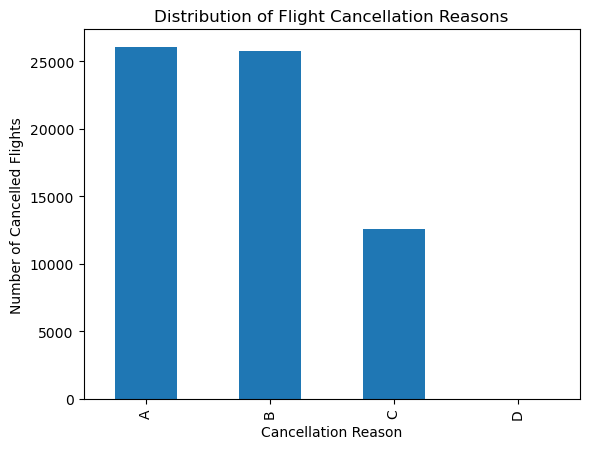

In [203]:


# Filter the dataset to only include cancelled flights
cancelled_flights = data[data['Cancelled'] == 1]

# Count the number of cancelled flights for each cancellation code
cancellation_counts = cancelled_flights['CancellationCode'].value_counts()

# Create a bar chart of the cancellation reasons and their frequencies
cancellation_counts.plot(kind='bar')
plt.title('Distribution of Flight Cancellation Reasons')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancelled Flights')
plt.show()

In [207]:
data['CancellationCode'].unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

# Question 13. 

Which route is the most frequent, in terms of the number of flights?

Hint: Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)

In [224]:
# Group the data by origin and destination, and count the number of flights for each unique route
routes = (data.groupby(['Origin', 'Dest'])
                   .size()
                   .reset_index(name='count'))

# Create a new column that represents the route in reverse order
routes['reverse_route'] = routes['Dest'] + routes['Origin']

# Concatenate the two route columns to include both directions of each route
all_routes = pd.concat([routes[['Origin', 'Dest', 'count']], routes[['Dest', 'Origin', 'count']].rename(columns={'Dest': 'Origin', 'Origin': 'Dest'})])

# Find the most frequent route
most_frequent_route = all_routes.loc[all_routes['count'].idxmax()]


In [ ]:
print(most_frequent_route['Origin']) 
print(most_frequent_route['Dest'])
print(most_frequent_route['count'])

# Question 14. 

Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

Hint: consider only positive delays14. 

In [26]:
# Filter the dataset to only include flights with positive departure delays
delayed_flights = data[data['DepDelay'] > 0]

# Group delayed flights by the 'Origin' and 'Dest' columns and count the number of delayed flights for each unique route
delayed_routes = (delayed_flights.groupby(['Origin', 'Dest']).size().reset_index(name='DelayedFlights').sort_values('DelayedFlights', ascending=False).head(5))

# Create a new dataframe that includes only the flights on the top 5 delayed routes
 top_delayed_flights = delayed_flights[delayed_flights[['Origin', 'Dest']].apply(lambda x: tuple(x) in set(delayed_routes[['Origin', 'Dest']].apply(tuple, axis=1)), axis=1)]

# Filter the new dataframe to only include flights with weather-related cancellation codes and count the number of such flights
 weather_delayed_flights = top_delayed_flights[top_delayed_flights['CancellationCode'].isin(['B', 'C', 'D'])]

# Count the number of weather-related delayed flights on the top 5 routes
# num_weather_delayed_flights = len(weather_delayed_flights)

#print("The top-5 delayed routes (in terms of the number of delayed flights) are:")
# print(delayed_routes)

#print("\nOut of all the flights on these routes, there were {} flights with weather conditions contributing to a delay.".format(num_weather_delayed_flights))


In [ ]:
# Filter completed flights with positive delays
completed_flights = data[(data.Cancelled == 0) & (data.DepDelay > 0)]

# Group the data by route and count the number of delayed flights for each route
delayed_routes = completed_flights.groupby(['Origin', 'Dest']).agg({'DepDelay': 'count'}).reset_index()
delayed_routes = delayed_routes.rename(columns={'DepDelay': 'NumDelayedFlights'})

# Sort the data in descending order by the number of delayed flights and select the top 5 routes
top_5_delayed_routes = delayed_routes.sort_values(by='NumDelayedFlights', ascending=False).head(5)

# Filter the original DataFrame by the selected top 5 routes and count the number of flights with weather conditions contributing to a delay
num_weather_delays = completed_flights[completed_flights[['Origin', 'Dest']].apply(lambda x: tuple(x) in set(top_5_delayed_routes[['Origin', 'Dest']].apply(tuple, axis=1)), axis=1) & (completed_flights.WeatherDelay > 0)].shape[0]

# Print the results
print('Top 5 delayed routes:')
print(top_5_delayed_routes)

print('\nNumber of flights with weather conditions contributing to a delay on the top 5 delayed routes:', num_weather_delays)


# Question 15. 

Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.

Choose all correct statements:

In [64]:
# Create a new series from DepTime, removing missing values
dep_time = data['DepTime'].dropna()

# Convert the hour to an integer
dep_hour = dep_time.apply(lambda x: int(str(int(x)).zfill(4)[:2]))

# Count the number of occurrences of each hour and sort the results in ascending order
hourly_distribution = dep_hour.value_counts().sort_index()

print(hourly_distribution)

# Question 16. 

Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.

Hint: Look for official meteorological winter months for the Nothern Hemisphsere.

Choose all correct statements:

# Queestion 17.

Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.

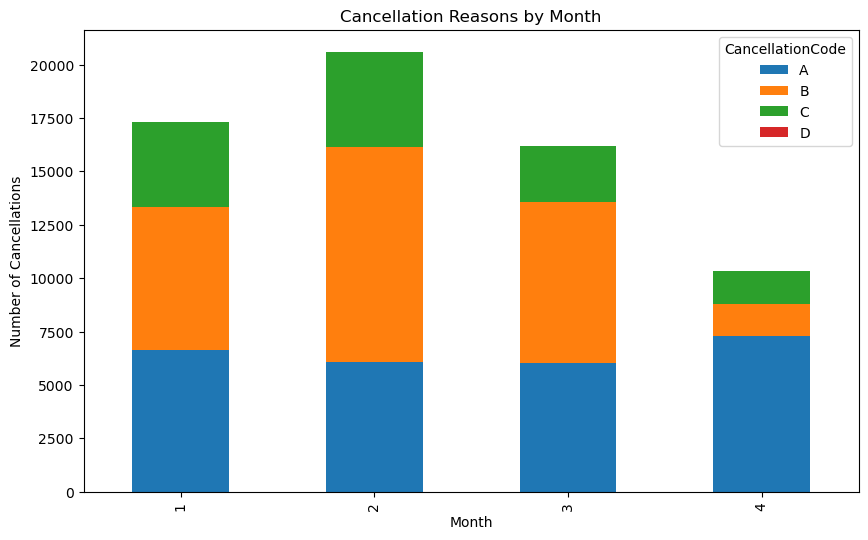

In [8]:
import matplotlib.pyplot as plt

# create a new dataframe with cancelled flights
cancelled_flights = data[data['Cancelled'] == 1]

# group cancelled flights by month and cancellation code
cancelled_by_month = cancelled_flights.groupby(['Month', 'CancellationCode']).size().reset_index(name='count')

# pivot table to reshape data for plotting
cancelled_by_month_pivot = cancelled_by_month.pivot(index='Month', columns='CancellationCode', values='count')

# plot the bar chart
cancelled_by_month_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# set the title and axis labels
plt.title('Cancellation Reasons by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')

# show the plot
plt.show()


# Question 18.

Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.

In [20]:
# filter the data for cancellations due to Carrier
carrier_cancellations = data[data['CancellationCode'] == 'A']

# group by month and sum the cancellations for each month
monthly_carrier_cancellations = carrier_cancellations.groupby('Month')['Cancelled'].sum()

# find the month with the maximum cancellations due to Carrier
max_month = monthly_carrier_cancellations.idxmax()

print(f"The month with the greatest number of cancellations due to Carrier is {max_month}.")

The month with the greatest number of cancellations due to Carrier is 4.


4

# Question 19.

Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.

In [27]:
# filter the data for cancellations due to Carrier and for the month with the greatest number of cancellations due to Carrier
max_month = 4  # replace with the month with the greatest number of cancellations due to Carrier found in the previous question
carrier_cancellations = data[(data['CancellationCode'] == 'A') & (data['Month'] == max_month)]

# group by carrier and sum the cancellations for each carrier
carrier_cancellations_count = carrier_cancellations.groupby('UniqueCarrier')['Cancelled'].sum()

#  carrier with the greatest number of cancellations due to carrier
max_carrier = carrier_cancellations_count.idxmax()

print(f"The carrier with the greatest number of cancellations due to carrier in the corresponding month is {max_carrier}.")

The carrier with the greatest number of cancellations due to carrier in the corresponding month is AA.


# Question 20.

Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and
departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). You can exclude delay time values higher than
a corresponding .95 percentile).

In [30]:
# Step 1
delays = data[['UniqueCarrier', 'ArrDelay', 'DepDelay']]

# Step 2
delays = delays[(delays['ArrDelay'] >= 0) & (delays['DepDelay'] >= 0)]

# Step 3
arr_delay_95 = delays['ArrDelay'].quantile(0.95)
dep_delay_95 = delays['DepDelay'].quantile(0.95)

# Step 4
delays = delays[(delays['ArrDelay'] <= arr_delay_95) & (delays['DepDelay'] <= dep_delay_95)]

# Step 5
median_delays = delays.groupby('UniqueCarrier')[['ArrDelay', 'DepDelay']].median()

# Step 6
lowest_median_carrier = median_delays[(median_delays['ArrDelay'] == median_delays['ArrDelay'].min()) & (median_delays['DepDelay'] == median_delays['DepDelay'].min())].index[0]

print(f"The carrier with the lowest median delay time for both arrivals and departures is {lowest_median_carrier}.")


The carrier with the lowest median delay time for both arrivals and departures is AQ.
